<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/working_with_raster_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Raster Data in R

Zia Ahmed, University at Buffalo

# Working with Raster Data in R

Raster data processing in R is commonly done using packages such as **`raster`** and **`rgdal`**. Raster data consists of grids of cells, where each cell holds a value representing some information, such as elevation, temperature, or land cover type. The **`raster`** package provides functions for reading, manipulating, and analyzing raster data, while the **`rgdal`** package focuses on reading and writing geospatial raster data formats.

The **`terra`** package is an advanced geospatial package in R that provides powerful tools for working with raster data. It is designed to handle large datasets efficiently and offers a wide range of capabilities for raster data processing, analysis, and visualization. **`terra`** is considered a successor to the **`raster`** package and aims to provide better performance and support for more complex operations.

Here are some key features and concepts of the **`terra`** package:

1.  **Efficiency and Performance:** **`terra`** is optimized for performance, making it suitable for processing large raster datasets. It leverages modern computing hardware and parallel processing capabilities to efficiently handle computations.

2.  **Raster Objects:** **`terra`** introduces the concept of "SpatioTemporalRaster" objects, which are used to represent raster data along with its spatial and temporal attributes.

3.  **Basic Operations:** Similar to the **`raster`** package, **`terra`** allows you to perform basic operations like reading, writing, displaying, and extracting values from raster data.

4.  **Spatial and Temporal Operations:** **`terra`** supports spatial and temporal operations such as cropping, reprojecting, resampling, masking, and aggregating raster data. It also handles multi-layer raster stacks efficiently.

5.  **Advanced Analytics:** The package provides functions for more advanced spatial analytics, including focal operations (neighborhood analysis), zonal statistics, and mathematical operations on raster layers.

6.  **Memory Management:** **`terra`** uses a "lazy" evaluation approach, which means that computations are performed only when needed. This allows for more memory-efficient processing of large datasets.

7.  **Visualization:** The package includes visualization functions to help you create maps and plots of raster data.

8.  **Integration with Other Packages:** **`terra`** can be integrated with other geospatial packages like **`sf`** for vector data handling and analysis.

In this exerciser we will learn following raster processing techniques with R:

-   Basic Raster Operation

-   Clipping

-   Reclassification

-   Focal Statistics

-   Raster Algebra

-   Aggregation

-   Resample

-   Mosaic

-   Convert Raster to Point Data

-   Convert Point Data to Raster

-   Raster Stack and Raster Brick

### Install rpy2

In [2]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314932 sha256=adbdc040cfb7a8f12cdc4bbdf853f089d10d4bf26065178494083866c7384be8
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Packages

In [ ]:
%%R
install.packages(c('classInt', 'RColorBrewer', 'spatialEco', 'gridExtra'), lib='drive/My Drive/R/')

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf', 'rgeos' 'tidyverse', 'terra', 'devtools'), lib='drive/My Drive/R/')

### Load R packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library (terra)
library(sf)
library (rgdal)
library(tidyverse)
library(maptools)
library(classInt)
library(RColorBrewer)
library(spatialEco)

###  Data

We will use SRTM elevation data (250 m x 250 m) of all hilly districts of  Bangladesh and The data can be found [here](https://github.com/zia207/r-colab/tree/main/Data/Bangladesh/) for download.

We will use **rast()** function of **terra** package  to load raster in R


In [6]:
%%R
# if data in your google drive
dem<-terra::rast("/content/drive/MyDrive/Data/Bangladesh/Raster/hilly_district_DEM_BTM.tif")

Load data from github:

In [7]:
%%R
dem= terra::rast("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh/Raster/hilly_district_DEM_BTM.tif")

### Basic Raster Operation

#### Check projection system

In [9]:
%%R
crs(dem, parse = TRUE)

 [1] "PROJCRS[\"WGS_1984_Transverse_Mercator\","                   
 [2] "    BASEGEOGCRS[\"WGS 84\","                                 
 [3] "        DATUM[\"World Geodetic System 1984\","               
 [4] "            ELLIPSOID[\"WGS 84\",6378137,298.257223563,"     
 [5] "                LENGTHUNIT[\"metre\",1]]],"                  
 [6] "        PRIMEM[\"Greenwich\",0,"                             
 [7] "            ANGLEUNIT[\"degree\",0.0174532925199433]],"      
 [8] "        ID[\"EPSG\",4326]],"                                 
 [9] "    CONVERSION[\"Transverse Mercator\","                     
[10] "        METHOD[\"Transverse Mercator\","                     
[11] "            ID[\"EPSG\",9807]],"                             
[12] "        PARAMETER[\"Latitude of natural origin\",0,"         
[13] "            ANGLEUNIT[\"degree\",0.0174532925199433],"       
[14] "            ID[\"EPSG\",8801]],"                             
[15] "        PARAMETER[\"Longitude of natural o

#### Check raster attribute

In [8]:
%%R
dem

class       : SpatRaster 
dimensions  : 1329, 521, 1  (nrow, ncol, nlyr)
resolution  : 250, 250  (x, y)
extent      : 648050.4, 778300.4, 2295017, 2627267  (xmin, xmax, ymin, ymax)
coord. ref. : WGS_1984_Transverse_Mercator 
source      : hilly_district_DEM_BTM.tif 
name        :     Band_1 
min value   :  -7.796429 
max value   : 985.049622 


-   Nrow, Ncol: the number of rows and columns in the data (imagine a spreadsheet or a matrix).
-   Ncells: the total number of pixels or cells that make up the raster.
-   Resolution: the size of each pixel (deg decimal).
-   Extent: the spatial extent of the raster. This value will be in the same coordinate units as the coordinate reference system of the raster.
-   Coord ref: the coordinate reference system string for the raster. This raster is in Geographical Coordinate system with a datum of WGS 84.

#### Raster extent

In [12]:
%%R
ext(dem)

SpatExtent : 648050.374681405, 778300.374681405, 2295017.2625413, 2627267.2625413 (xmin, xmax, ymin, ymax)


#### Raster statistics

R allow you to calculate some basic statistics of raster data. We can use **summary** function to get some statistics of raster layer.

In [13]:
%%R
summary(dem)

     Band_1      
 Min.   : -5.92  
 1st Qu.: 29.36  
 Median : 64.96  
 Mean   :108.99  
 3rd Qu.:137.46  
 Max.   :956.86  
 NA's   :55264   


#### Histogram of raster

R-base function **hist()** is also useful to know frequency of raster values

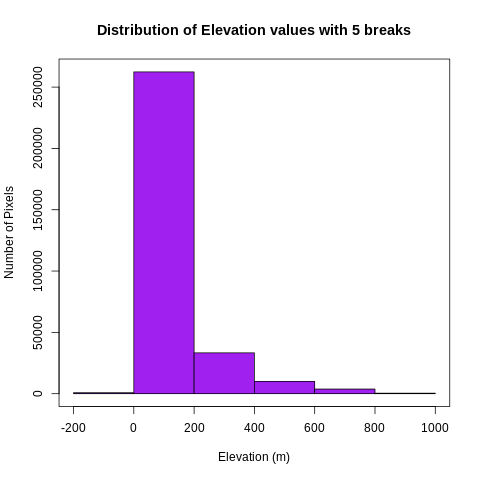

In [14]:
%%R
HISTO.DEM<-hist(dem,
     breaks=6,
     col= "purple",			                                     # color of histogram
     main="Distribution of Elevation values with 5 breaks",     # tittle of the plot
     xlab= "Elevation (m)",                                     # x-axis name
     ylab = "Number of Pixels")		                            # y-axis name
box()

#### Plot raster

We can plot raster in diffrent ways in R.
R base function **plot()** can easily apply on raster object for visualization:  

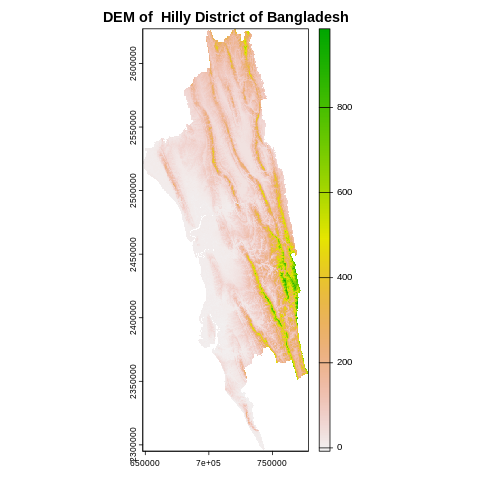

In [15]:
%%R
plot(dem, main="DEM of  Hilly District of Bangladesh")

R has an image() function that allows you to control the way a raster is rendered on the screen. The plot() function in R has a base setting for the number of pixels that it will plot (100,000 pixels). The image command thus might be better for rendering larger rasters.

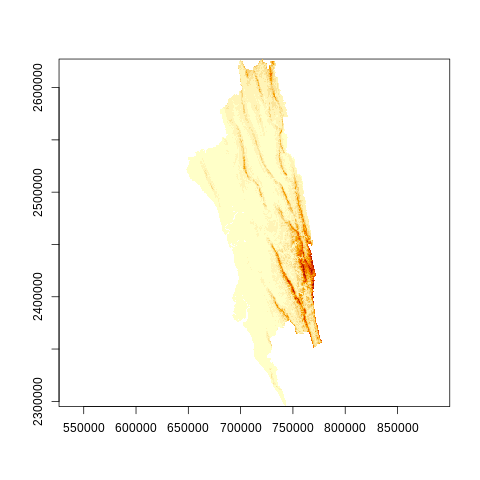

In [16]:
%%R
image(dem)

To visualize raster in R using ggplot2, first we need to convert it to a dataframe. The terra package has an built-in function for conversion to a plotable dataframe. Then we can applly geom_raster() of ggplot().  

In [17]:
%%R
dem.df <- as.data.frame(dem, xy = TRUE)%>%
  glimpse()

Rows: 310,665
Columns: 3
$ x      <dbl> 720925.4, 720175.4, 720425.4, 720675.4, 720925.4, 721175.4, 719…
$ y      <dbl> 2627142, 2626892, 2626892, 2626892, 2626892, 2626892, 2626642, …
$ Band_1 <dbl> 357.0371, 318.1637, 320.6357, 317.4960, 355.9710, 440.9489, 251…


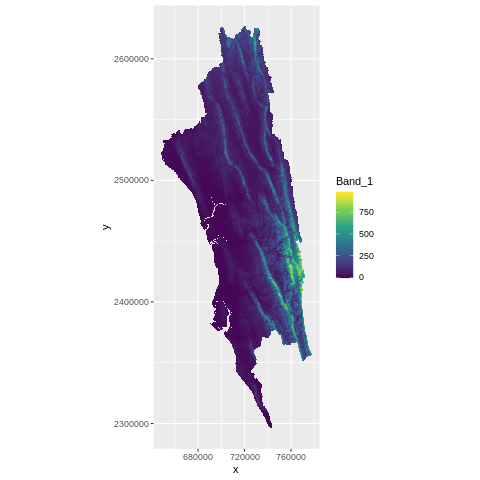

In [18]:
%%R
dem %>% as.data.frame(xy = TRUE) %>%
ggplot() +
    geom_raster(aes(x = x, y = y, fill = Band_1)) +
    scale_fill_viridis_c() +
    coord_quickmap()

### Clipping

Raster clipping refers to the process of extracting a portion of a raster dataset based on a specified spatial extent or boundary. This is a common operation in geospatial analysis when you need to focus on a specific area of interest within a larger raster dataset. Raster clipping can help reduce the dataset's size, improve processing efficiency, and facilitate analysis that's relevant to a particular region.

In R, you can perform raster clipping using various packages, including **`raster`**, **`terra`**, and others. I'll provide examples using both the **`raster`** and **`terra`** packages.

In this exercise, we will clip hilly area DEM with extent of Bandarban district shape file. First we have to create a shape file of this district:

In [9]:
%%R
bd.dist = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp")

Reading layer `bd_district_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


In [10]:
%%R
bandarban.dist = bd.dist %>%
  rename(DIST_Name = ADM2_EN) %>%
  filter(DIST_Name == "Bandarban")

Before clipping, you have to make sure both raster and vector data are in same projection systems.

In [49]:
%%R
identical(crs(dem), crs(bandarban.dist ))

[1] FALSE


It looks like DEM in UTM and district shape files is BUTM project system. We have bring them in same pojection system before clipping. Here we reproject  DEM to BUTM using district shape files

In [13]:
%%R
dem.BTM <- terra::project(dem, crs(bandarban.dist))

In [50]:
%%R
identical(crs(dem.BTM), crs(bandarban.dist ))

[1] TRUE


Now we check shape file is overlay on dem:

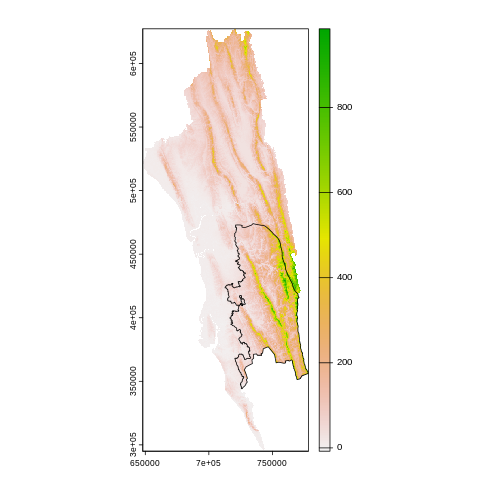

In [14]:
%%R
plot(dem.BTM)
plot(bandarban.dist$geometry, add=TRUE)

In R, clipping of a raster is two steps procedure, first you have to apply **crop()** function & then **mask** functions of **raster** package. **crop** returns a geographic subset of an object as specified by an **extent** object (or object from which an extent object can be extracted/created). **mask** Create a new Raster object that has the same values as input raster.

In [15]:
%%R
bandarban.dem<- crop(dem.BTM, bandarban.dist)
bandarban.dem <-raster::mask(dem.BTM, bandarban.dist)

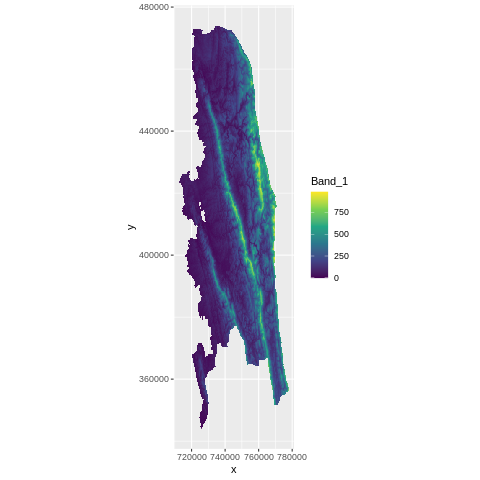

In [16]:
%%R
bandarban.dem %>% as.data.frame(xy = TRUE) %>%
ggplot() +
    geom_raster(aes(x = x, y = y, fill = Band_1)) +
    scale_fill_viridis_c() +

    coord_quickmap()

We can write raster using **terra::writeRaster()** function

In [17]:
%%R
terra::writeRaster(bandarban.dem, "/content/drive/MyDrive/Data/Bangladesh/Raster/bandarban_dem_BTM.tiff",filetype = "GTiff", overwrite = TRUE )

### Reclassification

Raster reclassification is the process of assigning new values to the cells of a raster dataset based on predefined criteria. This operation is commonly used in geospatial analysis to reclassify continuous raster data (e.g., elevation, temperature) into discrete categories (e.g., low, medium, high).

In R, you can perform raster reclassification using packages like raster or terra packages

#### Histigram

Before reclassification, we will create a histogram with 5 breaks, of dem raster

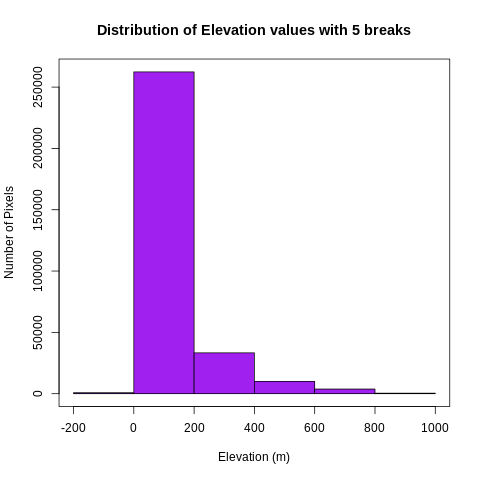

In [18]:
%%R
hist.dem<-hist(dem,
     breaks=4,
     col= "purple",			                                    # color of histogram
     main="Distribution of Elevation values with 5 breaks",     # tittle of the plot
     xlab= "Elevation (m)",                                     # x-axis name
     ylab = "Number of Pixels")		                            # y-axis name
box()

Now, you can check where are breaks and how many pixels in each category, and use these breaks to plot a raster layer

In [19]:
%%R
hist.dem$breaks

[1] -200    0  200  400  600  800 1000


In [21]:
%%R
hist.dem$counts

[1]    778 262373  33316  10008   3775    415


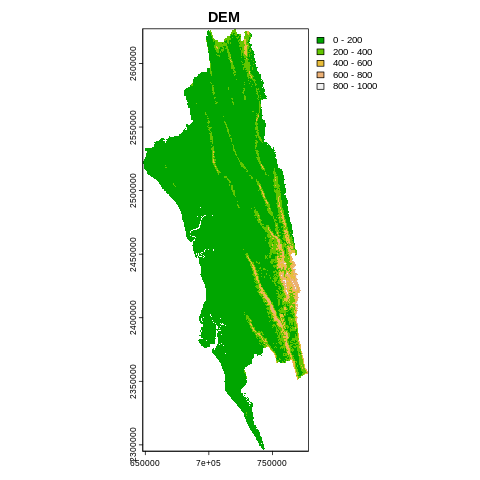

In [22]:
%%R
plot(dem,
     breaks = c(0, 200, 400, 600, 800, 1000),
     col = terrain.colors(7),
     main="DEM ")

We will use following breaks of histogram to reclassify the dem raster. First, you have to create classification matrix

-   Class 1: -200 - 0 m (low elevation)
-   Class 2: 0 - 400 m (medium elevation)
-   Class 3: 400 - 1000 (Inf) m (high elevation)

In [23]:
%%R
# Create a dataframe
reclass_df <- c(-200, 200, 1,
                200, 400, 2,
                400, Inf, 3)
reclass_df

[1] -200  200    1  200  400    2  400  Inf    3


Next, you have to reshape the data frame to matrix using **matrix** function

In [24]:
%%R
reclass_m <- matrix(reclass_df,
                ncol = 3,
                byrow = TRUE)
reclass_m

     [,1] [,2] [,3]
[1,] -200  200    1
[2,]  200  400    2
[3,]  400  Inf    3


Now you have to apply **terra::classify()** function of raster package using re-class_m object.

In [26]:
%%R
dem.reclass <-  terra::classify(dem,
                     reclass_m)

Now we plot the reclassified raster using **plot** function with a nice looking legend

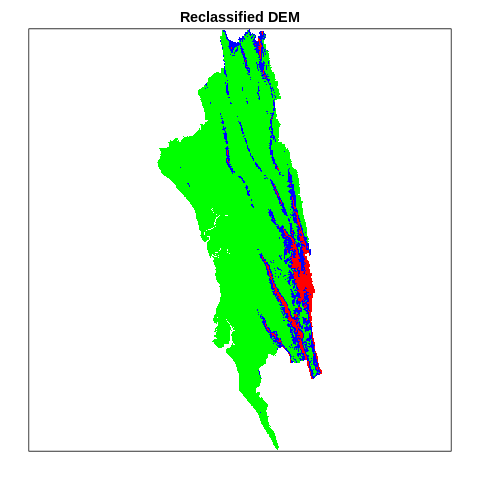

In [27]:
%%R
plot(dem.reclass,
     legend = FALSE,
     col = c("green", "blue", "red"), axes = FALSE,
     main = "Reclassified DEM")
legend("topright",
       legend = c("Low", "Medium", "High"),
       fill = c("green", "blue", "red"),
       border = FALSE,
       bty = "n") # turn off legend border
box()

#### Quantile

If you want create a raster map using the quantile, you fave to use **classInt** package. The **classIntervals** function is create a custom breaks of raster values using different styles (such as "fixed", "sd", "equal", "pretty", "quantile", "kmeans", "hclust", "bclust", "fisher", & "jenks"). For details, please see help, just type **?classIntervals** in R console

First, we have to convert raster to vector using **values** function. Then, you have to create a object with a quantile interval applying **classIntervals** function to vector data.

In [28]:
%%R
value.vector <- values(dem)
value.vector <- value.vector[value.vector != 0]
at = round(classIntervals(value.vector, n = 10, style = "quantile")$brks, 0)

Now, we plot the DEM raster using the this custom break. We will use **sppot** function from **sp** package to plot raster data with state boundary shape file. Before that we will create a custom color palette using **colorRampPalette** of **RColorBrewer**.

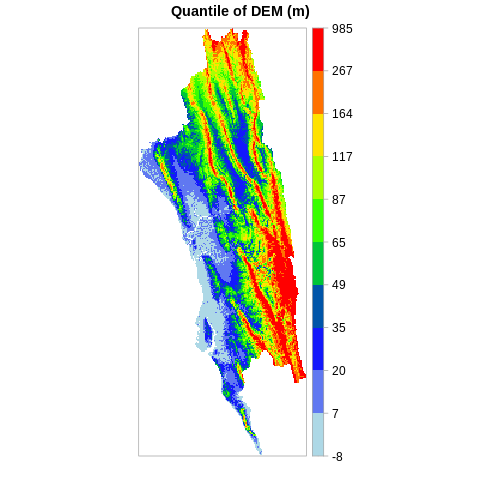

In [29]:
%%R
rgb.palette <- colorRampPalette(c("lightblue","blue","green","yellow","red"),
space = "rgb")
#polys<- list("sp.lines", as(dem, "SpatialLines"), col="grey", lty=1)  # CO state boundary
spplot(dem, main = "Quantile of DEM (m)",
   at=at,
   #sp.layout=list(polys),
   par.settings=list(axis.line=list(col="darkgrey",lwd=1)),
   colorkey=list(space="right",height=1, width=1.3,at=1:11,labels=list(cex=1.0,at=1:11,
   labels=c("-8","7","20","35","49","65","87","117","164","267","985"))),
   col.regions=rgb.palette(100))

### Focal Statistics

Focal statistics, also known as neighborhood or moving window statistics, involve performing calculations on a raster dataset using a moving window that slides over each cell. This window defines a local area around each cell, and calculations are carried out based on the values within that window. This technique is commonly used for various geospatial analysis tasks, such as smoothing, edge detection, and texture analysis.

In R, you can perform focal statistics using packages like raster and terra.

To illustrate the neighborhood processing for Focal Statistics calculating a Sum statistic, consider the processing cell with a value of 5 in the following diagram. A rectangular 3 by 3 cell neighborhood shape is specified. The sum of the values of the neighboring cells (3 + 2 + 3 + 4 + 2 + 1 + 4 = 19) plus the value of the processing cell (5) equals 24 (19 + 5 = 24). So a value of 24 is given to the cell in the output raster in the same location as the processing cell in the input raster.

The above figure demonstrates how the calculations are performed on a single cell in the input raster. In the following diagram, the results for all the input cells are shown. The cells highlighted in yellow identify the same processing cell and neighborhood as in the example above.

We will calculate focal mean of each cell of DEM data using **focal()** function of terra package.

In [30]:
%%R
focal.sum<- focal(dem,
	w=matrix(1/9,nrow=9,ncol=9), 	# matrix of weights for 9 x 9
	fun=sum)

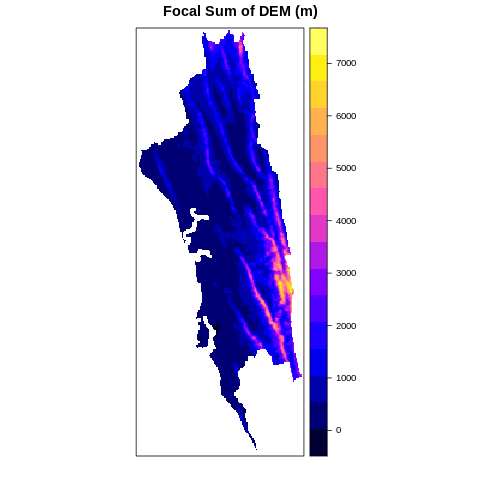

In [31]:
%%R
spplot(focal.sum, main="Focal Sum of DEM (m)")

In [32]:
%%R
focal.mean<- focal(dem,
	w=matrix(1/9,nrow=9,ncol=9), 	# matrix of weights for 3 x 3
	fun=mean)

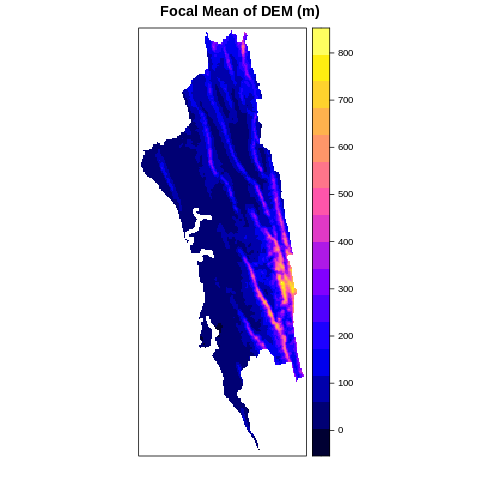

In [34]:
%%R
spplot(focal.mean,main="Focal Mean of DEM (m)")

### Raster Algebra

Raster algebra, also known as map algebra, involves performing mathematical operations on raster datasets to create new raster outputs. It's a fundamental technique in geospatial analysis that allows you to combine, modify, and analyze raster data using various arithmetic and logical operations.

A simple sample of raster algebra in R is to convert unit of DEM raster from meter to feet (1 m = 3.28084 feet)

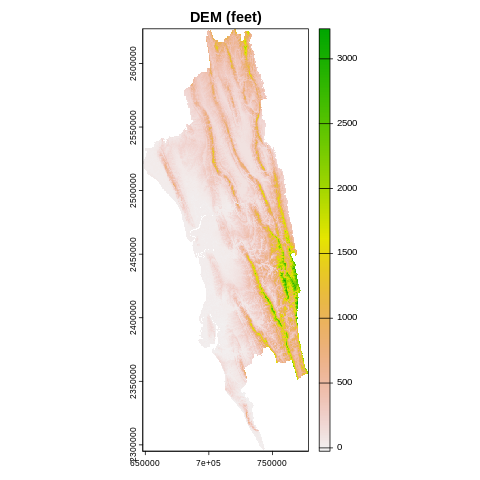

In [35]:
%%R
dem.feet<-dem*3.28084
plot(dem.feet, main= "DEM (feet)")

### Aggregation

Raster aggregation involves converting a high-resolution raster dataset into a lower-resolution raster dataset by grouping or summarizing cells into larger cells. This process reduces the level of detail in the data and can help improve processing efficiency and visualization for large datasets. Aggregation is often used when working with raster data at different scales, or when matching the resolution of one raster to another for analysis or visualization purposes.

First, we will create 500 x 500 km raster (mean & standard deviation) from 250 m x 250 m raster using **aggregate** function of **raster** package. To achieve this, we can combine pixels 2 by 2 (horizontally and vertically) using the aggregate() function and the argument fact = 2.

In [36]:
%%R
mean.DEM<-aggregate(dem, fact=2, fun=mean)
sd.DEM<-aggregate(dem, fact=2, fun=sd)
se.DEM<-sd.DEM/sqrt(2)
mean.DEM

class       : SpatRaster 
dimensions  : 665, 261, 1  (nrow, ncol, nlyr)
resolution  : 500, 500  (x, y)
extent      : 648050.4, 778550.4, 2294767, 2627267  (xmin, xmax, ymin, ymax)
coord. ref. : WGS_1984_Transverse_Mercator 
source(s)   : memory
name        :     Band_1 
min value   :  -4.500583 
max value   : 922.961380 


In [43]:
%%R
p1<-spplot(mean.DEM, main="500 m x 500 m of DEM")
p2<-spplot(sd.DEM, main="SD (m) ")
p3<-spplot(se.DEM, main="SE (m) )")

In [ ]:
%%R
library(gridExtra)

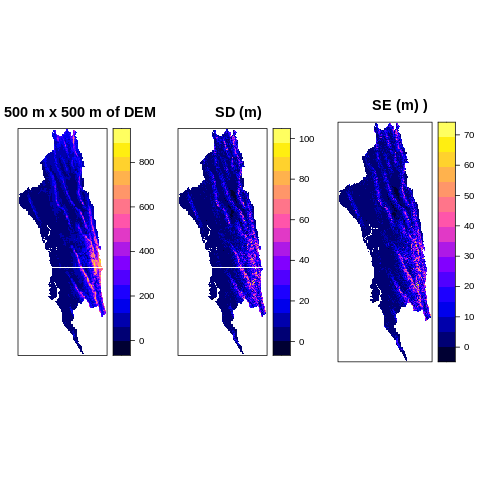

In [44]:
%%R
grid.arrange(p1, p2, p3, ncol=3)

### Disaggregation

If aggregating is the process of combining pixels, disaggregating is the process of splitting pixels into smaller ones. This operation is done with **disagg(**). Using the original 250m x 250m dem, each pixel will be disaggregated into smaller pixels (50 m x 50 m), once again using the **fact** argument.

In [47]:
%%R
dem.50 <- disagg(dem, fact = 5)
dem.50

class       : SpatRaster 
dimensions  : 6645, 2605, 1  (nrow, ncol, nlyr)
resolution  : 50, 50  (x, y)
extent      : 648050.4, 778300.4, 2295017, 2627267  (xmin, xmax, ymin, ymax)
coord. ref. : WGS_1984_Transverse_Mercator 
source      : spat_H18yb6IJmxuC6uY_238.tif 
name        :     Band_1 
min value   :  -7.796429 
max value   : 985.049622 


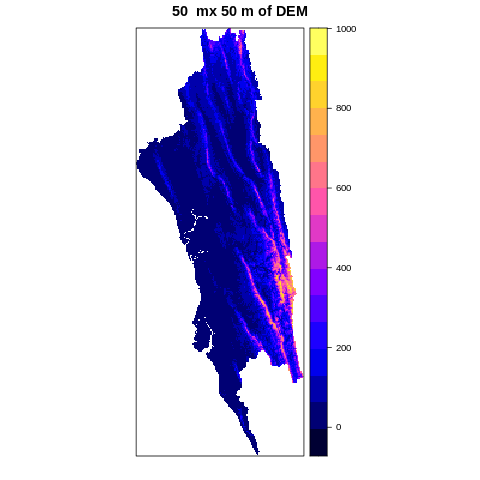

In [48]:
%%R
spplot(dem.50, main="50 m x 50 m of DEM")

### Resampling

Resampling is a technique used in geospatial analysis to change the spatial resolution or alignment of raster datasets. Resampling involves calculating new pixel values based on the original pixel values within a defined neighborhood or using interpolation methods. It's often used when you need to match the resolution of one raster to another, change the resolution of a raster for analysis, or prepare data for visualization.

We will re-sample 500 m raster to 250 raster again using dem (250 m). We will use **resample()** function. Here two methods available: **bilinear** for bilinear interpolation, or **ngb* for using the nearest neighbor. First argument is a raster object to be re-sampled and second argument is raster object with parameters that first raster should be re-sampled to.

In [45]:
%%R
dem.250m<-resample(mean.DEM, dem, method='bilinear') #
dem.250m

class       : SpatRaster 
dimensions  : 1329, 521, 1  (nrow, ncol, nlyr)
resolution  : 250, 250  (x, y)
extent      : 648050.4, 778300.4, 2295017, 2627267  (xmin, xmax, ymin, ymax)
coord. ref. : WGS_1984_Transverse_Mercator 
source(s)   : memory
name        :     Band_1 
min value   :  -3.292471 
max value   : 908.095215 


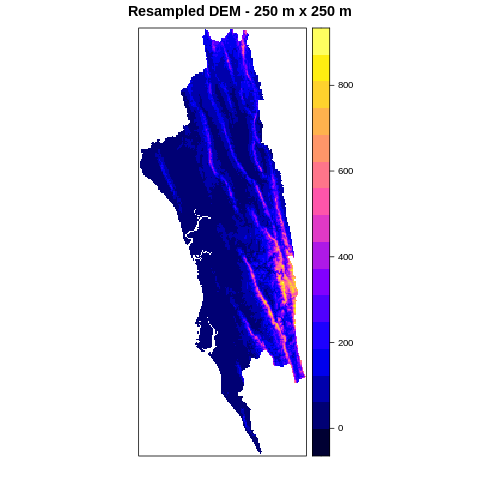

In [46]:
%%R
spplot(dem.250m, main="Resampled DEM - 250 m x 250 m")

### Mosaic

Raster mosaicking is the process of combining multiple raster datasets to create a single, continuous raster dataset that covers a larger geographic area. Mosaicking is commonly used when you have multiple raster images that need to be merged into a seamless and complete representation of a larger region. This technique is often employed in remote sensing, geospatial analysis, and cartography.